In [2]:
# Standard Library Imports
import os
import pandas as pd
import sys

# Third Party Imports
from IPython.display import Image, display
import matplotlib.pyplot as plt

# Local Module Imports
sys.path.append('../src/complete_collision_recorder/')
import complete_collision as cc
import utils as u

# Map project directories
root_dir, src_dir, data_dir, models_dir = u.map_project_directories(notebook=True)

/media/dzielinski06/HDD1/AI894 - Capstone/Complete Collision Recorder/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [76]:
OSTATS_summary_ann_df = pd.read_csv(os.path.join(data_dir, "lookup", "ostats_crash_dashboard_bike_ped_totals.csv"))
narrative_scoring_df = pd.read_csv(os.path.join(data_dir, "processed", "GenAI_df.csv"))

In [77]:
OSTATS_summary_ann_df['OSTATS_NON_SERIOUS'] = OSTATS_summary_ann_df['OSTATS_PED_NON_SERIOUS'] + OSTATS_summary_ann_df['OSTATS_BICYCLE_NON_SERIOUS']
OSTATS_summary_ann_df

,YEAR,OSTATS_PED_NON_SERIOUS,OSTATS_PED_SERIOUS,OSTATS_BICYCLE_NON_SERIOUS,OSTATS_BICYCLE_SERIOUS,OSTATS_SERIOUS,OSTATS_TOTAL,OSTATS_NON_SERIOUS
0,2020,130,46,65,10,56,251,195
1,2021,151,61,97,9,70,318,248
2,2022,160,58,90,6,64,314,250
3,2023,147,46,83,11,57,287,230


In [78]:
narrative_scoring_df['YEAR'] = narrative_scoring_df['CAD_ID'].apply(lambda x: int(str(x)[:4]))
narrative_scoring_df.columns

Index(['Unnamed: 0', 'CAD_ID', 'CAD_TEXT', 'OH1_TEXT', 'BIKE_CLE_TEXT',
       'CRASH_SEVERITY_CD', 'INTERSECTION_IND', 'U1_PRECRASH_ACTION_CD',
       'U1_TURN_CD', 'U1_TYPE_OF_UNIT_CD', 'U2_PRECRASH_ACTION_CD',
       'U2_TURN_CD', 'U2_TYPE_OF_UNIT_CD', 'concatenated_text',
       'SEVERITY_PRED', 'SEVERITY_PRED_TEXT', 'GCAT_PRED_TEXT', 'GenAISummary',
       'SevereAiReviewInd', 'YEAR'],
      dtype='object')

In [69]:
total_collisions_by_year = pd.DataFrame(narrative_scoring_df.groupby('YEAR').size()).reset_index()
total_collisions_by_year.columns = ['YEAR', 'Total BikeCLE Collisions']
total_collisions_by_year



,YEAR,Total BikeCLE Collisions
0,2020,546
1,2021,555
2,2022,508
3,2023,565
4,2024,1


In [79]:
severe_collisions_by_year = pd.DataFrame(narrative_scoring_df[(narrative_scoring_df['SevereAiReviewInd'].astype(int) == 1) |
                                                      (narrative_scoring_df['SEVERITY_PRED'].astype(int) == 1) |
                                                      (narrative_scoring_df['CRASH_SEVERITY_CD'].isin([1, 2]))
                                                      ].groupby('YEAR').size()).reset_index()
severe_collisions_by_year. columns = ['YEAR', 'BikeCLE_Serious']
severe_collisions_by_year

,YEAR,BikeCLE_Serious
0,2020,76
1,2021,94
2,2022,89
3,2023,91


In [80]:
analysis_merge = OSTATS_summary_ann_df.merge(total_collisions_by_year, on='YEAR', how='left').merge(severe_collisions_by_year, on='YEAR', how='left')
analysis_merge_totals = pd.DataFrame(analysis_merge.sum()).T
analysis_merge_totals.drop(columns=['YEAR'], inplace=True)
analysis_merge_totals


,OSTATS_PED_NON_SERIOUS,OSTATS_PED_SERIOUS,OSTATS_BICYCLE_NON_SERIOUS,OSTATS_BICYCLE_SERIOUS,OSTATS_SERIOUS,OSTATS_TOTAL,OSTATS_NON_SERIOUS,Total BikeCLE Collisions,BikeCLE_Serious
0,588,211,335,36,247,1170,923,2174,350


In [81]:
analysis_merge_totals['BikeCLE_NonSerious'] = analysis_merge_totals['Total BikeCLE Collisions'] - analysis_merge_totals['BikeCLE_Serious']
analysis_merge_totals['Serious_Under_Reporting_Rate'] = (analysis_merge_totals['BikeCLE_Serious'] - analysis_merge_totals['OSTATS_SERIOUS']) / analysis_merge_totals['OSTATS_SERIOUS']
analysis_merge_totals['NonSerious_Under_Reporting_Rate'] = (analysis_merge_totals['BikeCLE_NonSerious'] - analysis_merge_totals['OSTATS_NON_SERIOUS']) / analysis_merge_totals['BikeCLE_NonSerious']
analysis_merge_totals


,OSTATS_PED_NON_SERIOUS,OSTATS_PED_SERIOUS,OSTATS_BICYCLE_NON_SERIOUS,OSTATS_BICYCLE_SERIOUS,OSTATS_SERIOUS,OSTATS_TOTAL,OSTATS_NON_SERIOUS,Total BikeCLE Collisions,BikeCLE_Serious,BikeCLE_NonSerious,Serious_Under_Reporting_Rate,NonSerious_Under_Reporting_Rate
0,588,211,335,36,247,1170,923,2174,350,1824,0.417004,0.493969


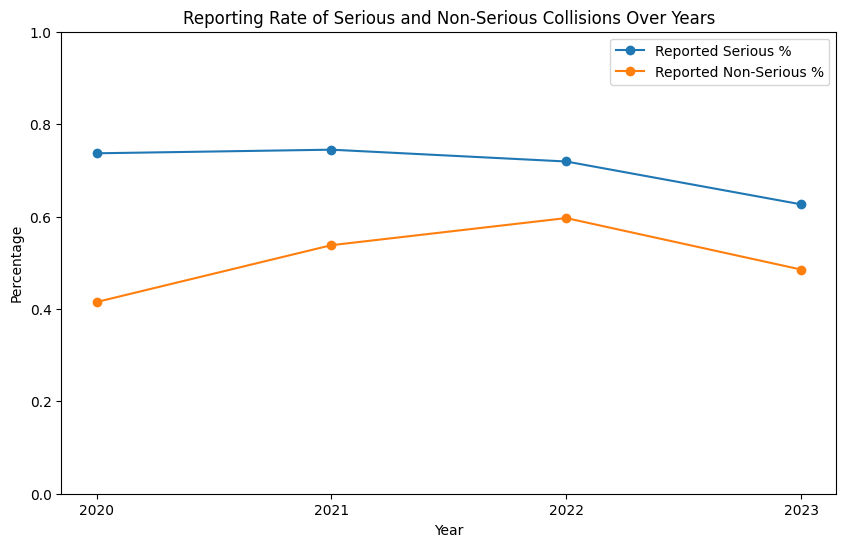

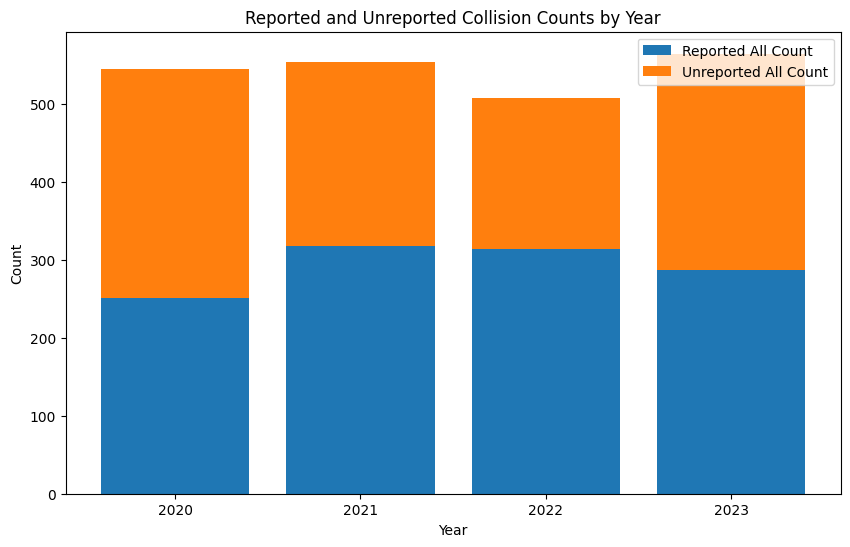

,YEAR,OSTATS_PED_NON_SERIOUS,OSTATS_PED_SERIOUS,OSTATS_BICYCLE_NON_SERIOUS,OSTATS_BICYCLE_SERIOUS,OSTATS_SERIOUS,OSTATS_TOTAL,OSTATS_NON_SERIOUS,Total BikeCLE Collisions,BikeCLE_Serious,BikeCLE_NonSerious,Unreported_Serious_Cnt,Unreported_Serious_Pct,Reported_Serious_Pct,Unreported_NonSerious_Cnt,Unreported_NonSerious_Pct,Reported_NonSerious_Pct,Unreported_All_Cnt,Reported_all_Cnt,Reported_All_Cnt
0,2020,130,46,65,10,56,251,195,546,76,470,20,0.263158,0.736842,275,0.585106,0.414894,295,251,251
1,2021,151,61,97,9,70,318,248,555,94,461,24,0.255319,0.744681,213,0.462039,0.537961,237,318,318
2,2022,160,58,90,6,64,314,250,508,89,419,25,0.280899,0.719101,169,0.403341,0.596659,194,314,314
3,2023,147,46,83,11,57,287,230,565,91,474,34,0.373626,0.626374,244,0.514768,0.485232,278,287,287


In [94]:
analysis_merge['BikeCLE_NonSerious'] = analysis_merge['Total BikeCLE Collisions'] - analysis_merge['BikeCLE_Serious']

analysis_merge['Unreported_Serious_Cnt'] = analysis_merge['BikeCLE_Serious'] - analysis_merge['OSTATS_SERIOUS']
analysis_merge['Unreported_Serious_Pct'] = analysis_merge['Unreported_Serious_Cnt'] / analysis_merge['BikeCLE_Serious'] 
analysis_merge['Reported_Serious_Pct'] = 1 - analysis_merge['Unreported_Serious_Pct']

analysis_merge['Unreported_NonSerious_Cnt'] = analysis_merge['BikeCLE_NonSerious'] - analysis_merge['OSTATS_NON_SERIOUS']
analysis_merge['Unreported_NonSerious_Pct'] = analysis_merge['Unreported_NonSerious_Cnt'] / analysis_merge['BikeCLE_NonSerious']
analysis_merge['Reported_NonSerious_Pct'] = 1 - analysis_merge['Unreported_NonSerious_Pct']

analysis_merge['Unreported_All_Cnt'] = analysis_merge['BikeCLE_Serious'] + analysis_merge['BikeCLE_NonSerious'] - analysis_merge['OSTATS_SERIOUS'] - analysis_merge['OSTATS_NON_SERIOUS']
analysis_merge['Reported_All_Cnt'] = analysis_merge['OSTATS_SERIOUS'] + analysis_merge['OSTATS_NON_SERIOUS']

# Plotting the reported serious and non-serious percentages without horizontal lines
plt.figure(figsize=(10, 6))
plt.plot(analysis_merge['YEAR'], analysis_merge['Reported_Serious_Pct'], label='Reported Serious %', marker='o')
plt.plot(analysis_merge['YEAR'], analysis_merge['Reported_NonSerious_Pct'], label='Reported Non-Serious %', marker='o')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Reporting Rate of Serious and Non-Serious Collisions Over Years')
plt.legend()
plt.grid(False)  # Show no grid lines
plt.xticks(analysis_merge['YEAR'])  # Set x-ticks to be the years only
plt.ylim(0, 1)  # Fix y-axis to be 0 to 1
plt.show()

# Plotting a stacked bar chart with Unreported_All_Cnt + Reported_All_Cnt by year
plt.figure(figsize=(10, 6))
plt.bar(analysis_merge['YEAR'], analysis_merge['Reported_all_Cnt'], label='Reported All Count')
plt.bar(analysis_merge['YEAR'], analysis_merge['Unreported_All_Cnt'], bottom=analysis_merge['Reported_all_Cnt'], label='Unreported All Count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Reported and Unreported Collision Counts by Year')
plt.legend()
plt.xticks(analysis_merge['YEAR'])
plt.show()

analysis_merge
